In [ ]:
pip install clean-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.7 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=67f8f4590d6d3cd33309d44cff6b2b7393963a90dba5e1e73ff6a863483a8595
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cleantext import clean
import re
import nltk

In [ ]:
dataset=pd.read_csv('/content/BullyDetectionFinal.csv')

In [ ]:
dataset.head()

,Name,Comment,Time,Likes,Reply Count,Output
0,All in One by Huma,Nice video👍🏽👍🏽,2022-10-01T07:24:17Z,0,0,non bully
1,Dr Shah,The theme music is so nostalgic ❤️🎶,2022-10-01T06:19:02Z,0,0,non bully
2,jani king master,Nice video,2022-10-01T04:40:02Z,0,0,non bully
3,jani king master,Nice vidoe,2022-10-01T04:39:51Z,0,0,non bully
4,Aiza khan,Pakistan won 🥳🥳🥳🥳🥳🥳🥳🥳💕💕💕💞💞😍😍😍💖💖💖🎈 Pakistan zi...,2022-09-30T20:44:33Z,1,0,non bully


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6303 entries, 0 to 6302
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         6303 non-null   object
 1   Comment      6303 non-null   object
 2   Time         6303 non-null   object
 3   Likes        6303 non-null   int64 
 4   Reply Count  6303 non-null   int64 
 5   Output       4136 non-null   object
dtypes: int64(2), object(4)
memory usage: 295.6+ KB


In [ ]:
dataset.shape

(6303, 6)

In [ ]:
dataset.Output

0       non bully
1       non bully
2       non bully
3       non bully
4       non bully
          ...    
6298    non bully
6299    non bully
6300    non bully
6301    non bully
6302    non bully
Name: Output, Length: 6303, dtype: object

In [ ]:
dataset=dataset.drop(['Name','Time','Likes','Reply Count'], axis=1)

In [ ]:
dataset.isna().sum()

Comment       0
Output     2167
dtype: int64

In [ ]:
dataset.isnull().sum()

Comment       0
Output     2167
dtype: int64

<Axes: >

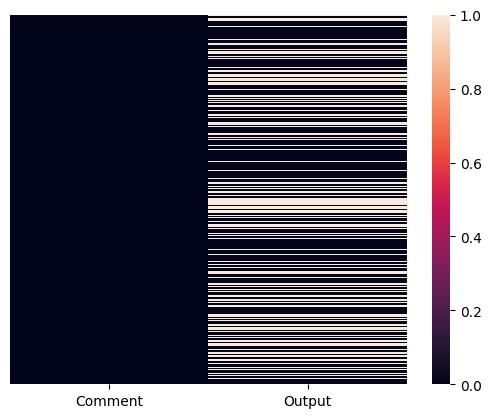

In [ ]:
sns.heatmap(dataset.isnull(), yticklabels=False)

<Axes: >

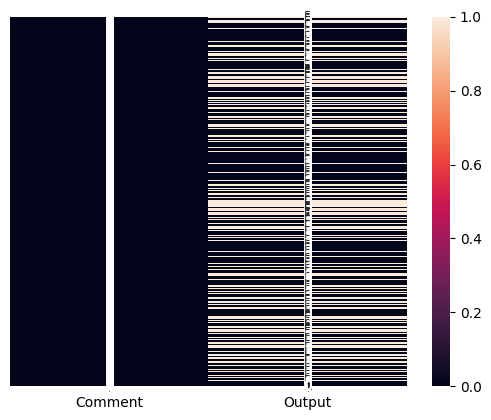

In [ ]:
sns.heatmap(dataset.isnull(), yticklabels=False, annot=True)

In [ ]:
dataset=dataset.dropna()

In [ ]:
dataset.shape

(4136, 2)

In [ ]:
dataset.isnull().sum()

Comment    0
Output     0
dtype: int64

In [ ]:
#str="Pakistan won 🥳🥳"
#clean(str, no_emoji=True)



In [ ]:
#str="Pakistan won 🥳🥳"
#clean(str, no_emoji=True)

#Function for removing the emojis
def myfunc(str):
  cleaned_data=clean(str, no_emoji=True)
  return cleaned_data


In [ ]:
dataset['Clean_coment']=""
dataset['Clean_coment'] = dataset['Comment'].apply(myfunc)

In [ ]:
dataset=dataset.drop('Comment',axis=1)

In [ ]:
dataset.head()

,Output,Clean_coment
0,non bully,nice video
1,non bully,the theme music is so nostalgic
2,non bully,nice video
3,non bully,nice vidoe
4,non bully,pakistan won pakistan zindabad pakistan team w...


In [ ]:
datset = dataset.drop_duplicates('Clean_coment')



In [ ]:
datset.head()

,Output,Clean_coment
0,non bully,nice video
1,non bully,the theme music is so nostalgic
3,non bully,nice vidoe
4,non bully,pakistan won pakistan zindabad pakistan team w...
9,non bully,rewatched only for shadab vs aleem dar


In [ ]:
CLEANR = re.compile('<.*?>')

def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext

In [ ]:

datset['Clean_coment'] = datset['Clean_coment'].apply(cleanhtml)


<ipython-input-30-ea42fb9705ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datset['Clean_coment'] = datset['Clean_coment'].apply(cleanhtml)


In [ ]:
datset

,Output,Clean_coment
0,non bully,nice video
1,non bully,the theme music is so nostalgic
3,non bully,nice vidoe
4,non bully,pakistan won pakistan zindabad pakistan team w...
9,non bully,rewatched only for shadab vs aleem dar
...,...,...
6298,non bully,the middle order of pakistan will get a dozen ...
6299,non bully,"for fans: its just a first match of series, sa..."
6300,non bully,the new tv graphics are amazing
6301,non bully,pakistan cricket team please fix your middle o...


In [ ]:
nltk.download('words')
words = set(nltk.corpus.words.words())
def remove_non_eng(str):
   b= " ".join(w for w in nltk.wordpunct_tokenize(str) if w.lower() in words or not w.isalpha())
   return b

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
datset['Clean_coment'] = datset['Clean_coment'].apply(remove_non_eng)

<ipython-input-33-8b4af699cc47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datset['Clean_coment'] = datset['Clean_coment'].apply(remove_non_eng)


In [ ]:
datset

,Output,Clean_coment
0,non bully,nice video
1,non bully,the theme music is so nostalgic
3,non bully,nice
4,non bully,won team was super
9,non bully,only for dar
...,...,...
6298,non bully,the middle order of will get a dozen of before...
6299,non bully,"for : its just a first match of series , team ..."
6300,non bully,the new graphics are amazing
6301,non bully,cricket team please fix your middle order


In [ ]:
def remove_nonalpha(str):
  new_str=re.sub(r'[^a-zA-Z\s]','',str)
  return new_str

In [ ]:
datset['Clean_coment'] = datset['Clean_coment'].apply(remove_nonalpha)

<ipython-input-36-9c65e7fdc524>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datset['Clean_coment'] = datset['Clean_coment'].apply(remove_nonalpha)


In [ ]:
datset.to_csv('cleaned_2.csv')